In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/assessment'

/content/drive/MyDrive/assessment


In [ ]:
%ls

 asssesment_b.ipynb      'Copy of EDA_DAS4000.ipynb'
 asssesment_final.ipynb   dataset_of_diabetes.csv


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Loading dataset

In [6]:
df = pd.read_csv('dataset_of_diabetes.csv', delimiter=",")
df [0:5]

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


# General observation

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [ ]:
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [ ]:
df.head(120)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.40,1.40,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.10,2.10,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.40,1.40,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.40,1.40,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.80,2.00,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,496,56826,F,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,21.0,P
116,498,488496,M,50,5.0,74,6.2,2.0,0.8,0.60,1.00,0.4,24.0,P
117,684,87658,F,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,23.0,P
118,700,87666,M,42,5.4,53,5.8,5.9,3.7,1.30,3.10,1.7,23.0,P


In [ ]:
df.shape

(1000, 14)

In [ ]:
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [ ]:
df.nunique()

,0
ID,800
No_Pation,961
Gender,3
AGE,50
Urea,110
Cr,113
HbA1c,111
Chol,77
TG,69
HDL,48


**Check for Missing Values**

In [ ]:
print(df.isnull().sum())

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


**Percentage of Missing Values**

In [ ]:
(df.isnull().sum()/(len(df)))*100

,0
ID,0.0
No_Pation,0.0
Gender,0.0
AGE,0.0
Urea,0.0
Cr,0.0
HbA1c,0.0
Chol,0.0
TG,0.0
HDL,0.0


**Distribution of Numerical Variables**

In [ ]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


**Summary statistics for numerical columns**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000.0,340.500000,2.403977e+02,1.0,125.75,300.5,550.25,800.00
No_Pation,1000.0,270551.408000,3.380758e+06,123.0,24063.75,34395.5,45384.25,75435657.00
AGE,1000.0,53.528000,8.799241e+00,20.0,51.00,55.0,59.00,79.00
Urea,1000.0,5.124743,2.935165e+00,0.5,3.70,4.6,5.70,38.90
Cr,1000.0,68.943000,5.998475e+01,6.0,48.00,60.0,73.00,800.00
HbA1c,1000.0,8.281160,2.534003e+00,0.9,6.50,8.0,10.20,16.00
Chol,1000.0,4.862820,1.301738e+00,0.0,4.00,4.8,5.60,10.30
TG,1000.0,2.349610,1.401176e+00,0.3,1.50,2.0,2.90,13.80
HDL,1000.0,1.204750,6.604136e-01,0.2,0.90,1.1,1.30,9.90
LDL,1000.0,2.609790,1.115102e+00,0.3,1.80,2.5,3.30,9.90


# Data preprocessing

**Data Cleaning**

'''
**Gender** there was specified incorrectly 1 time f as lowercase
'''

In [ ]:
df['Gender'].value_counts()

,count
Gender,
M,565
F,434
f,1


In [8]:
df['Gender'] = df['Gender'].replace('f', 'F')

Cleaning the column because of dublicates Y and N

In [9]:
df['CLASS'].value_counts()

,count
CLASS,
Y,840
N,102
P,53
Y,4
N,1


In [10]:

df['CLASS'] = df['CLASS'].astype(str).str.upper().str.strip()

Feature Encoding

In [11]:
le = LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender'].astype(str).str.strip().str.capitalize())

In [12]:
le = LabelEncoder()
df['CLASS_encoded'] = le.fit_transform(df['CLASS'].astype(str).str.strip())

In [13]:
X = df[['Gender_encoded','AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']]

y = df['CLASS_encoded']

# Vizualisation

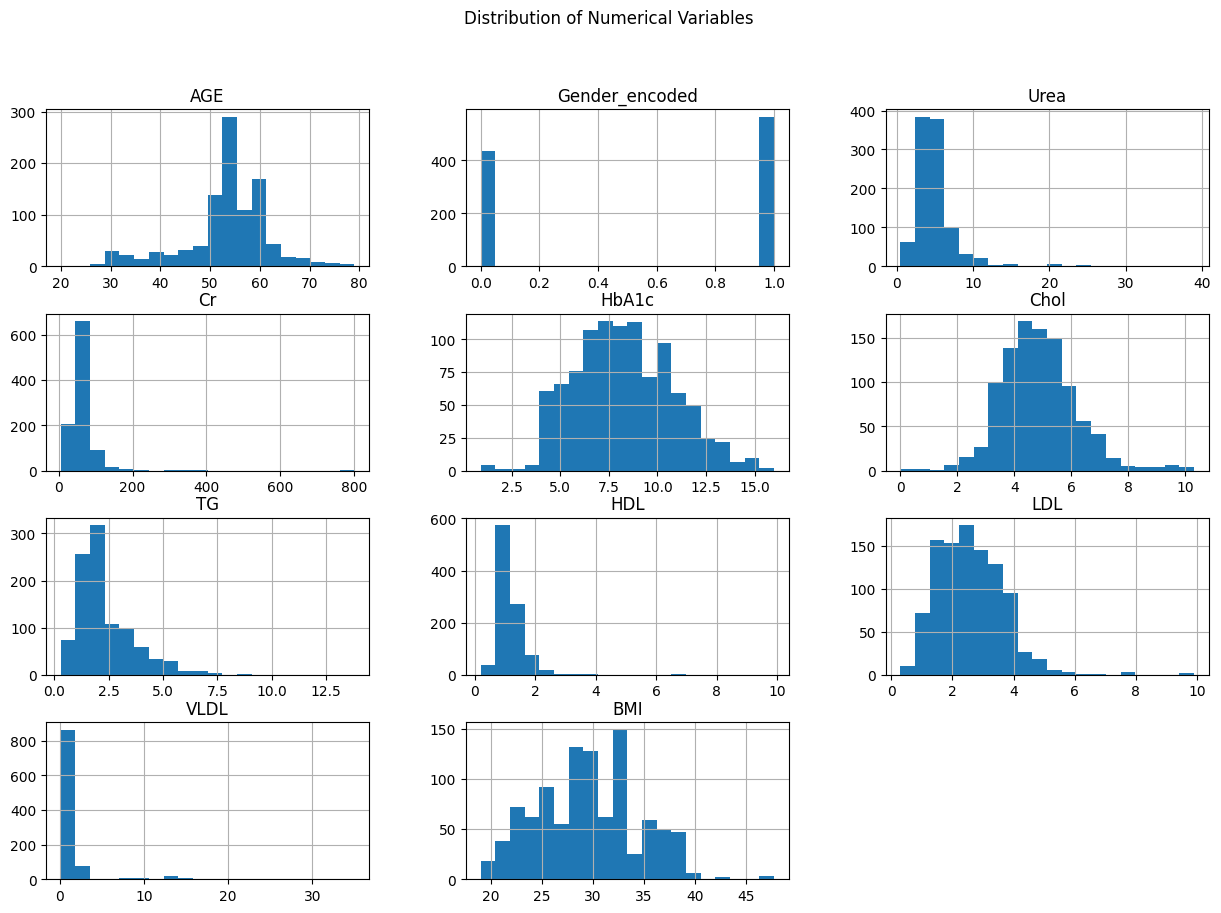

In [14]:
# Plot histograms for numerical columns
numerical_cols = ['AGE','Gender_encoded', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

In [ ]:
sns.pairplot(df, hue="CLASS");

Output hidden; open in https://colab.research.google.com to view.

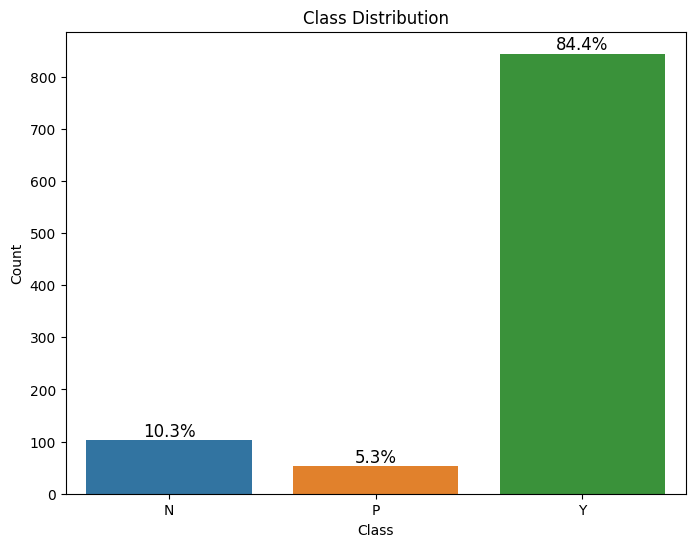

In [24]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
total = len(df)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='CLASS', data=df, hue='CLASS', palette=colors)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom', fontsize=12)

plt.show()


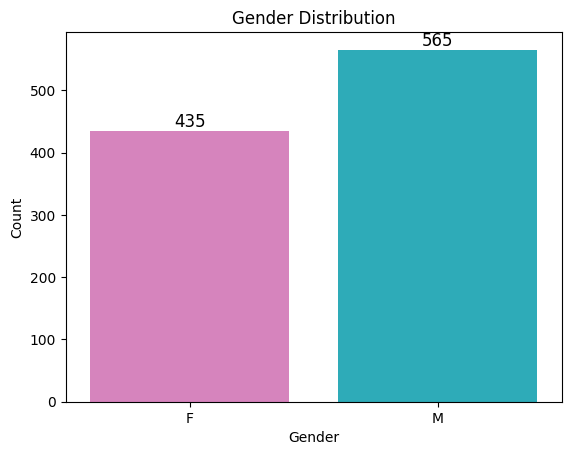

In [26]:
colors = ['#e377c2', '#17becf']


ax = sns.countplot(x='Gender', data=df, hue='Gender', palette=colors)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12)

plt.show()

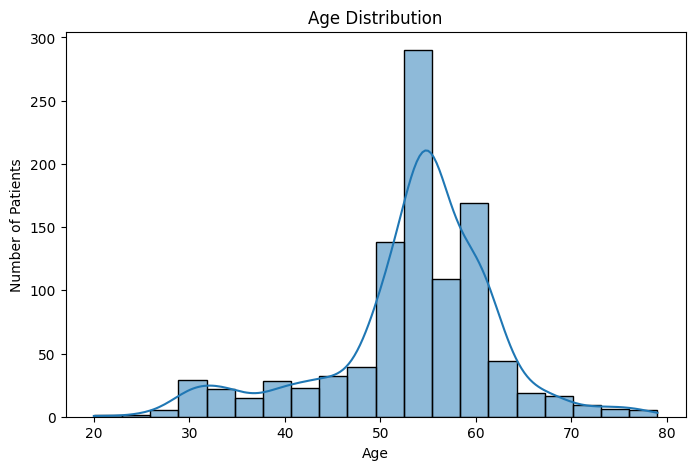

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='AGE', bins=20, kde=True, color='#1f77b4')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()

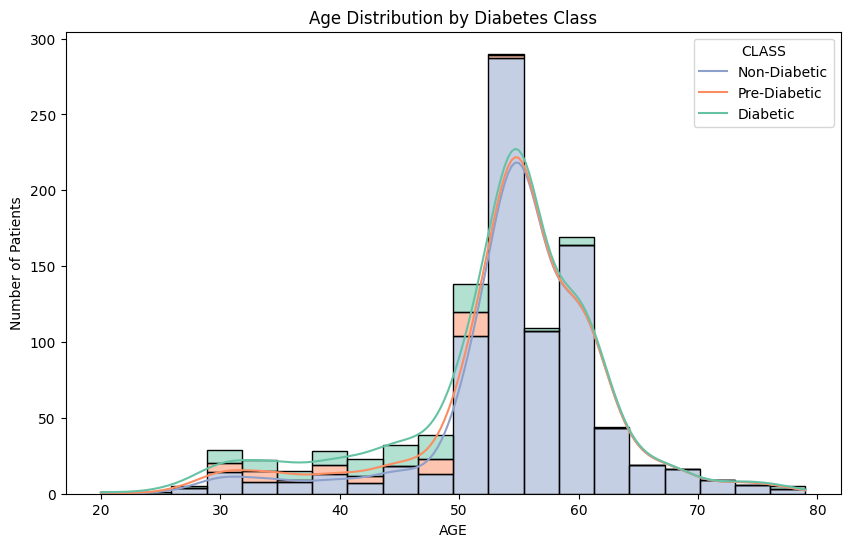

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AGE', hue='CLASS', bins=20, kde=True, palette='Set2', multiple='stack')
plt.title("Age Distribution by Diabetes Class")
plt.xlabel("AGE")
plt.ylabel("Number of Patients")
plt.legend(title='CLASS', labels=['Non-Diabetic', 'Pre-Diabetic', 'Diabetic'])
plt.show()

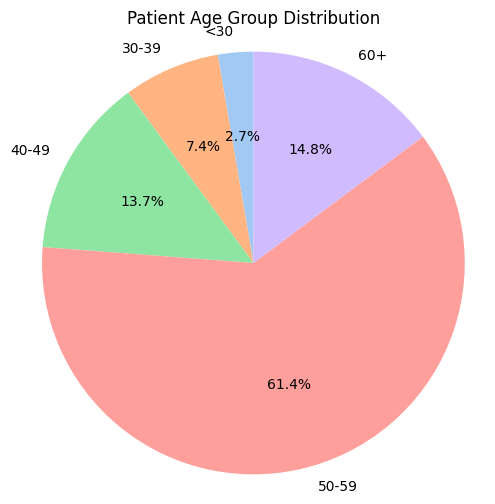

In [ ]:
bins = [0, 30, 40, 50, 60, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60+']
df['AgeGroup'] = pd.cut(df['AGE'], bins=bins, labels=labels)
age_counts = df['AgeGroup'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Patient Age Group Distribution")
plt.axis('equal')
plt.show()

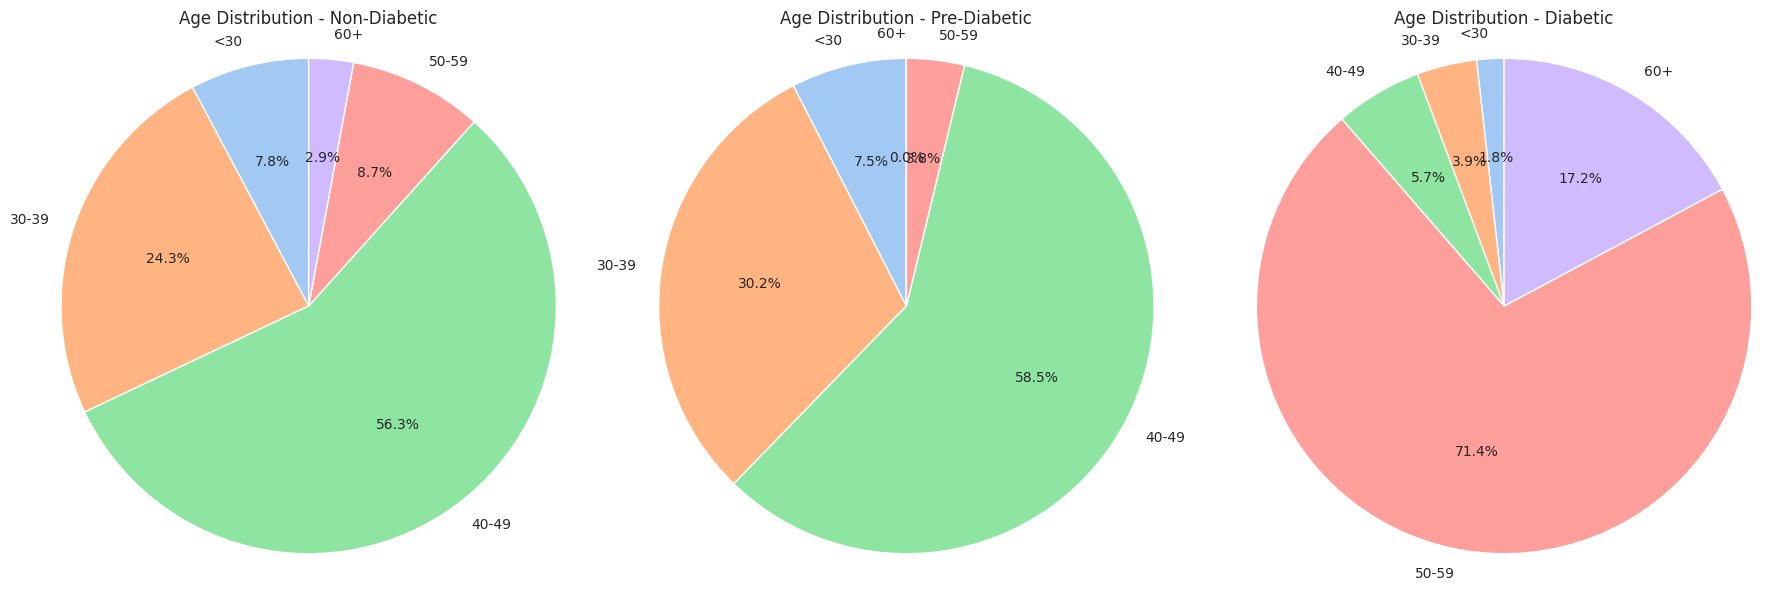

In [ ]:
bins = [0, 30, 40, 50, 60, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60+']
df['AgeGroup'] = pd.cut(df['AGE'], bins=bins, labels=labels)
age_counts = df['AgeGroup'].value_counts().sort_index()
sns.set_style("whitegrid")
colors = sns.color_palette("pastel")

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

classes = ['N', 'P', 'Y']
titles = ['Non-Diabetic', 'Pre-Diabetic', 'Diabetic']

for i, cls in enumerate(classes):
    subset = df[df['CLASS'] == cls]['AgeGroup'].value_counts().sort_index()
    axs[i].pie(subset, labels=subset.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[i].axis('equal')
    axs[i].set_title(f'Age Distribution - {titles[i]}')

plt.tight_layout()
plt.show()

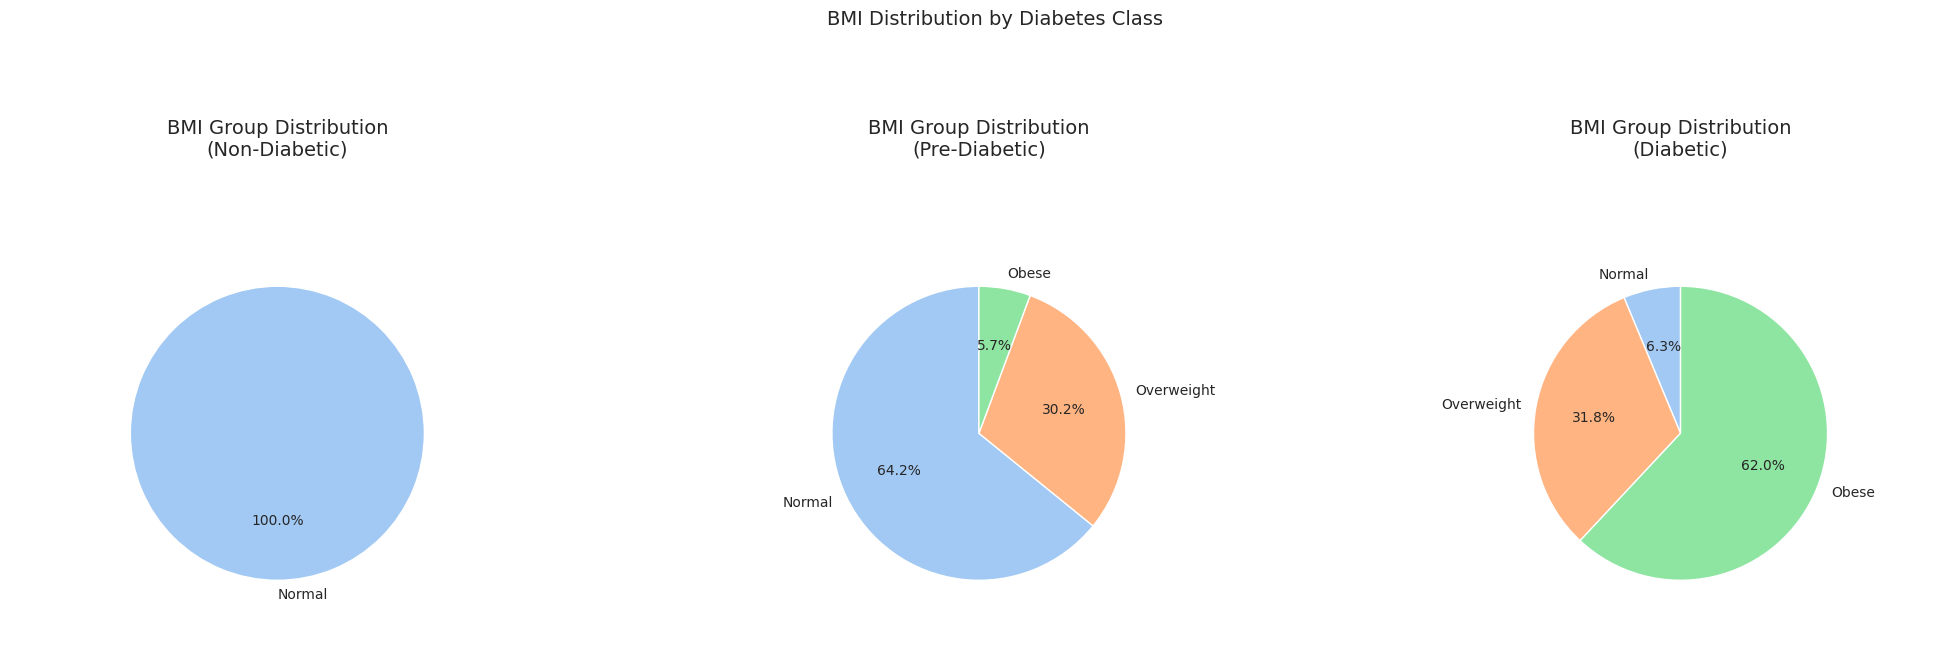

In [ ]:
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMIGroup'] = pd.cut(df['BMI'], bins=bins_bmi, labels=labels_bmi)

colors_bmi = sns.color_palette("pastel")

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
plt.subplots_adjust(wspace=0.8)

classes = ['N', 'P', 'Y']
titles = ['Non-Diabetic', 'Pre-Diabetic', 'Diabetic']

for i, cls in enumerate(classes):
    subset = df[df['CLASS'] == cls]['BMIGroup'].value_counts().sort_index()

    subset = subset[subset != 0]

    axs[i].pie(subset, labels=subset.index, autopct='%1.1f%%', startangle=90, colors=colors_bmi)
    axs[i].axis('equal')
    axs[i].set_title(f'BMI Group Distribution\n({titles[i]})', fontsize=14, pad=40)

plt.suptitle("BMI Distribution by Diabetes Class", fontsize=14, y=1.1)
plt.tight_layout()
plt.show()

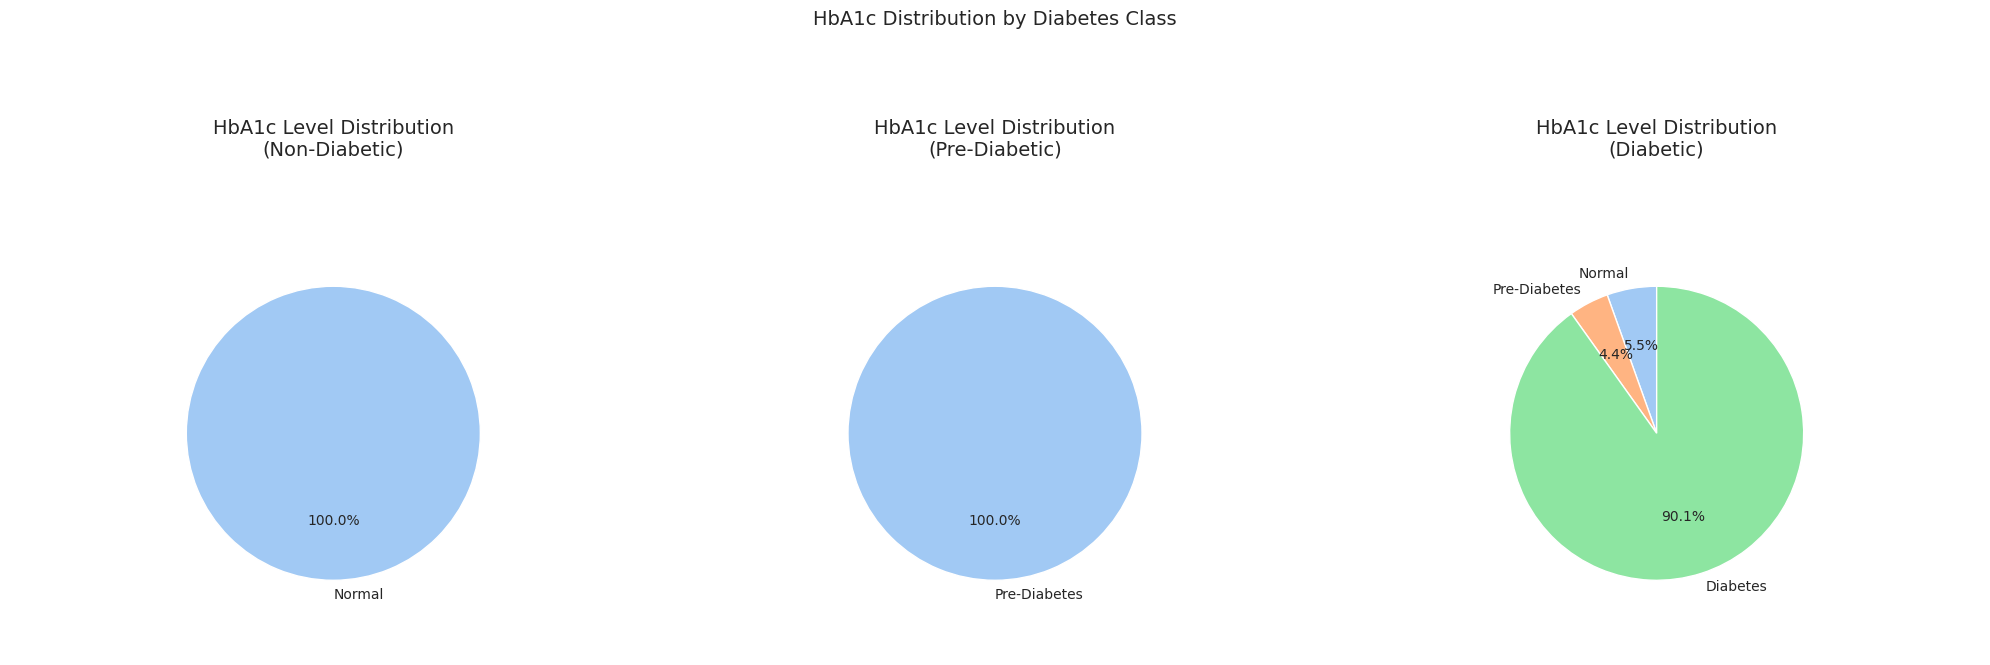

In [ ]:
hba1c_bins = [0, 5.6, 6.4, 15]
hba1c_labels = ['Normal', 'Pre-Diabetes', 'Diabetes']
df['HbA1cGroup'] = pd.cut(df['HbA1c'], bins=hba1c_bins, labels=hba1c_labels)

colors_hba1c = sns.color_palette("pastel")

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
plt.subplots_adjust(wspace=0.8)
classes = ['N', 'P', 'Y']
titles = ['Non-Diabetic', 'Pre-Diabetic', 'Diabetic']

for i, cls in enumerate(classes):
    subset = df[df['CLASS'] == cls]['HbA1cGroup'].value_counts().sort_index()
    subset = subset[subset != 0]
    axs[i].pie(subset, labels=subset.index, autopct='%1.1f%%', startangle=90, colors=colors_hba1c)
    axs[i].axis('equal')
    axs[i].set_title(f'HbA1c Level Distribution\n({titles[i]})', fontsize=14, pad=40)

plt.suptitle("HbA1c Distribution by Diabetes Class", fontsize=14, y=1.1)
plt.tight_layout()
plt.show()

**Summary table **

In [ ]:
columns_to_summarize = ['AGE', 'Gender_encoded', 'BMI', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'Cr']
grouped = df.groupby('CLASS')[columns_to_summarize].agg(['mean', 'std']).round(2)

grouped.columns = [' '.join(col).strip() for col in grouped.columns.values]

total_stats = df[columns_to_summarize].agg(['mean', 'std']).round(2)
total_stats.index = ['All (mean)', 'All (std)']
grouped.loc['All Patients'] = total_stats.values.flatten()
grouped = grouped.loc[['All Patients'] + [cls for cls in grouped.index if cls != 'All Patients']]

grouped.T

CLASS,All Patients,N,P,Y
AGE mean,53.53,44.23,43.28,55.31
AGE std,0.56,9.42,7.76,7.55
Gender_encoded mean,29.58,0.38,0.68,0.58
Gender_encoded std,8.28,0.49,0.47,0.49
BMI mean,4.86,22.37,23.93,30.81
BMI std,2.35,1.42,2.71,4.32
HbA1c mean,1.20,4.56,6.00,8.88
HbA1c std,2.61,0.92,0.19,2.26
Chol mean,1.85,4.27,4.58,4.95
Chol std,29.58,1.28,1.04,1.30


In [ ]:
columns_to_summarize = ['AGE', 'Gender_encoded', 'BMI', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'Cr']
def format_mean_std(series):
    return f"{series.mean():.2f} ± {series.std():.2f}"
classes = df['CLASS'].unique().tolist()
summary = pd.DataFrame(index=columns_to_summarize)
summary['All Patients (n={})'.format(len(df))] = df[columns_to_summarize].apply(format_mean_std)

for cls in classes:
    subset = df[df['CLASS'] == cls]
    summary[f"{cls} (n={len(subset)})"] = subset[columns_to_summarize].apply(format_mean_std)
summary.rename(index={'Gender_encoded': 'Male (%)'}, inplace=True)

summary


,All Patients (n=1000),N (n=103),P (n=53),Y (n=844)
AGE,53.53 ± 8.80,44.23 ± 9.42,43.28 ± 7.76,55.31 ± 7.55
Male (%),0.56 ± 0.50,0.38 ± 0.49,0.68 ± 0.47,0.58 ± 0.49
BMI,29.58 ± 4.96,22.37 ± 1.42,23.93 ± 2.71,30.81 ± 4.32
HbA1c,8.28 ± 2.53,4.56 ± 0.92,6.00 ± 0.19,8.88 ± 2.26
Chol,4.86 ± 1.30,4.27 ± 1.28,4.58 ± 1.04,4.95 ± 1.30
TG,2.35 ± 1.40,1.63 ± 1.03,2.13 ± 1.06,2.45 ± 1.43
HDL,1.20 ± 0.66,1.23 ± 0.51,1.13 ± 0.38,1.21 ± 0.69
LDL,2.61 ± 1.12,2.63 ± 0.98,2.49 ± 0.87,2.62 ± 1.14
VLDL,1.85 ± 3.66,0.94 ± 1.48,0.98 ± 0.50,2.02 ± 3.93
Cr,68.94 ± 59.98,62.80 ± 30.02,66.08 ± 41.57,69.87 ± 63.58


Correlation Heatmap

<Axes: >

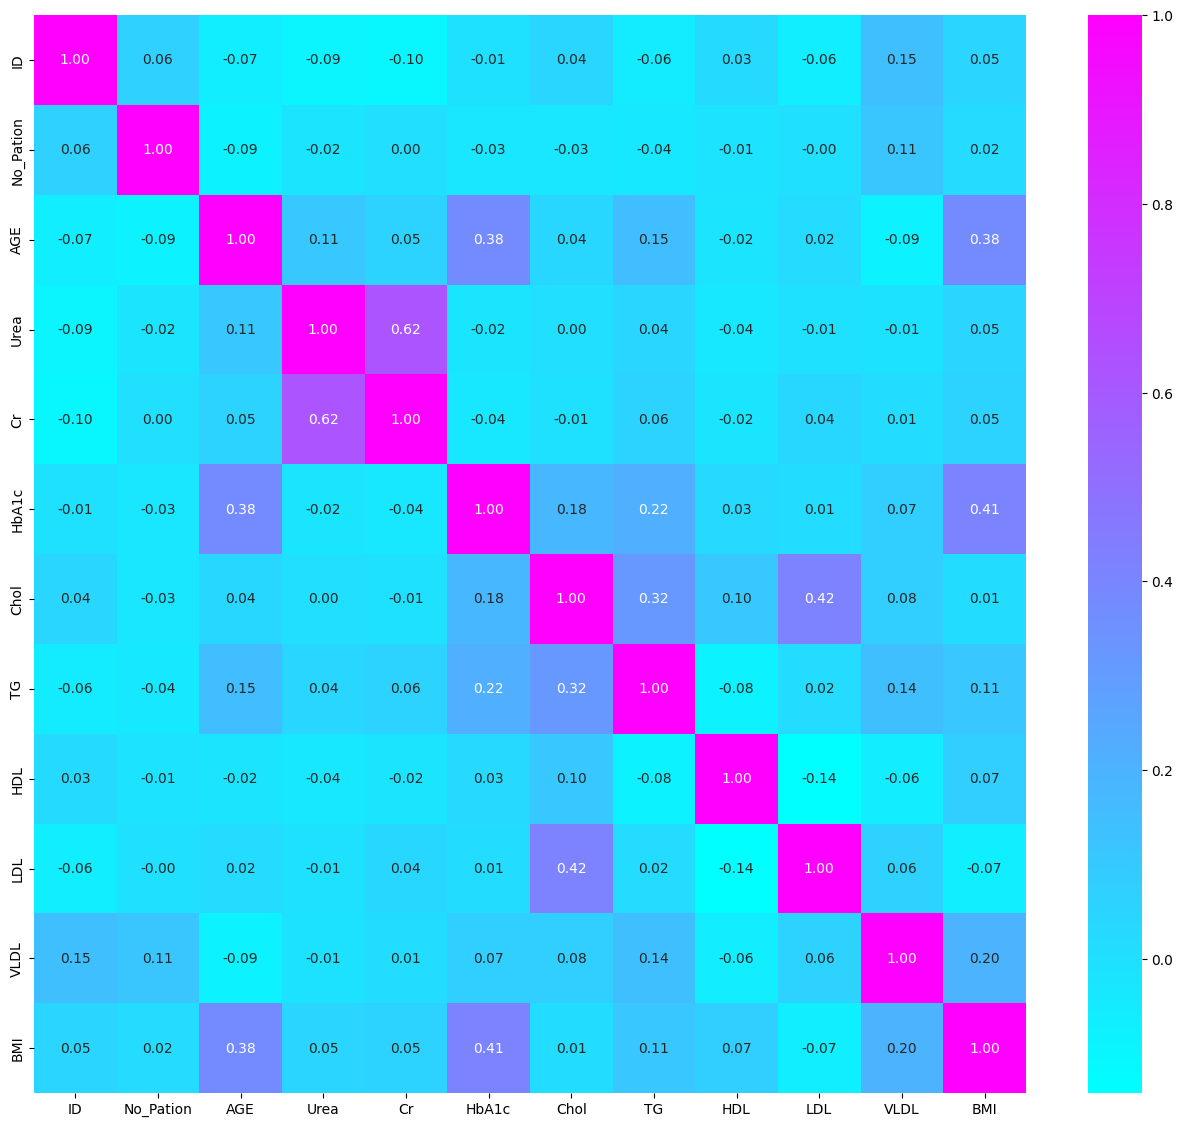

In [ ]:
plt.figure(figsize=(16, 14))
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix =numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='cool', fmt='.2f')


# Random Forest

Setting up RF

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}


# Modeling

In [ ]:
diabet_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
grid_search = GridSearchCV(diabet_classifier, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# Prediction

In [ ]:
y_pred = best_rf.predict(X_test)

# Evaluation


 Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.90      0.93        21
           P       1.00      1.00      1.00         6
           Y       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.98      0.98       200


Accuracy Score: 0.98


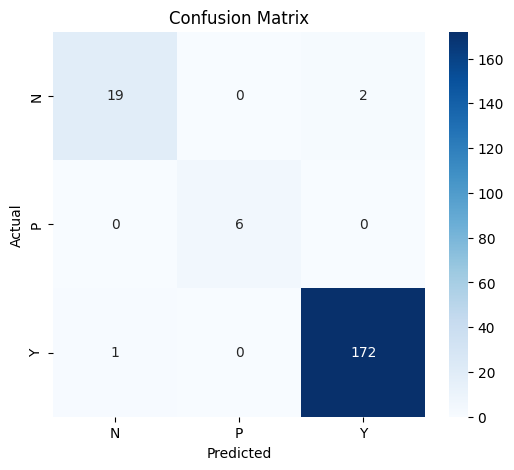

In [ ]:
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=['N', 'P', 'Y']))

print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.2f}")

# 10. Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




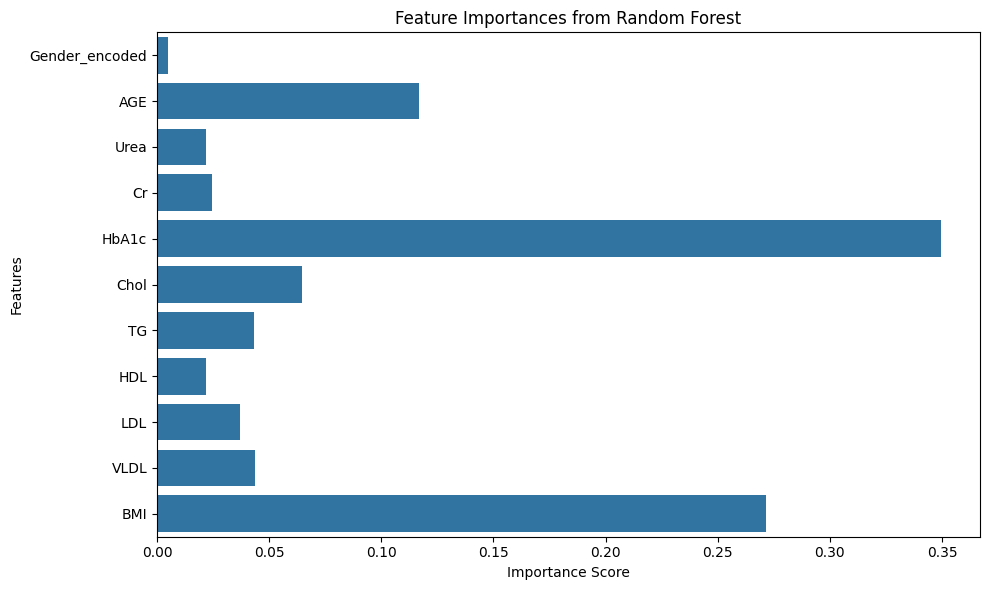

In [ ]:
# 11. Feature Importance Plot
importances = best_rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

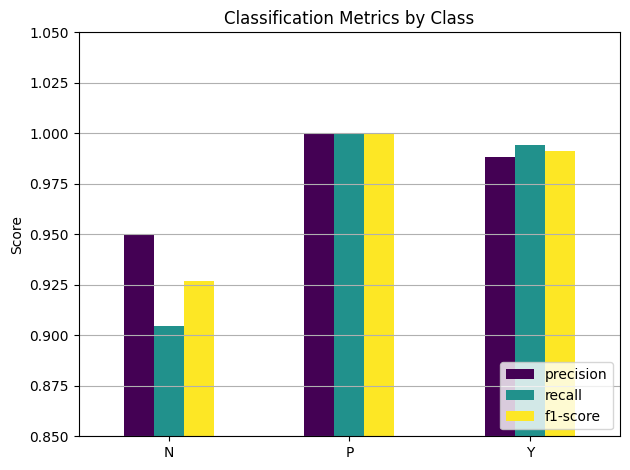

In [ ]:
report = classification_report(y_test, y_pred, target_names=['N', 'P', 'Y'], output_dict=True) # Explicitly define target_names

# Convert to DataFrame for visualization
report_df = pd.DataFrame(report).transpose().iloc[:3]

# Plot
plt.figure(figsize=(8, 5))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', colormap='viridis')
plt.title('Classification Metrics by Class')
plt.ylabel('Score')
plt.ylim(0.85, 1.05)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

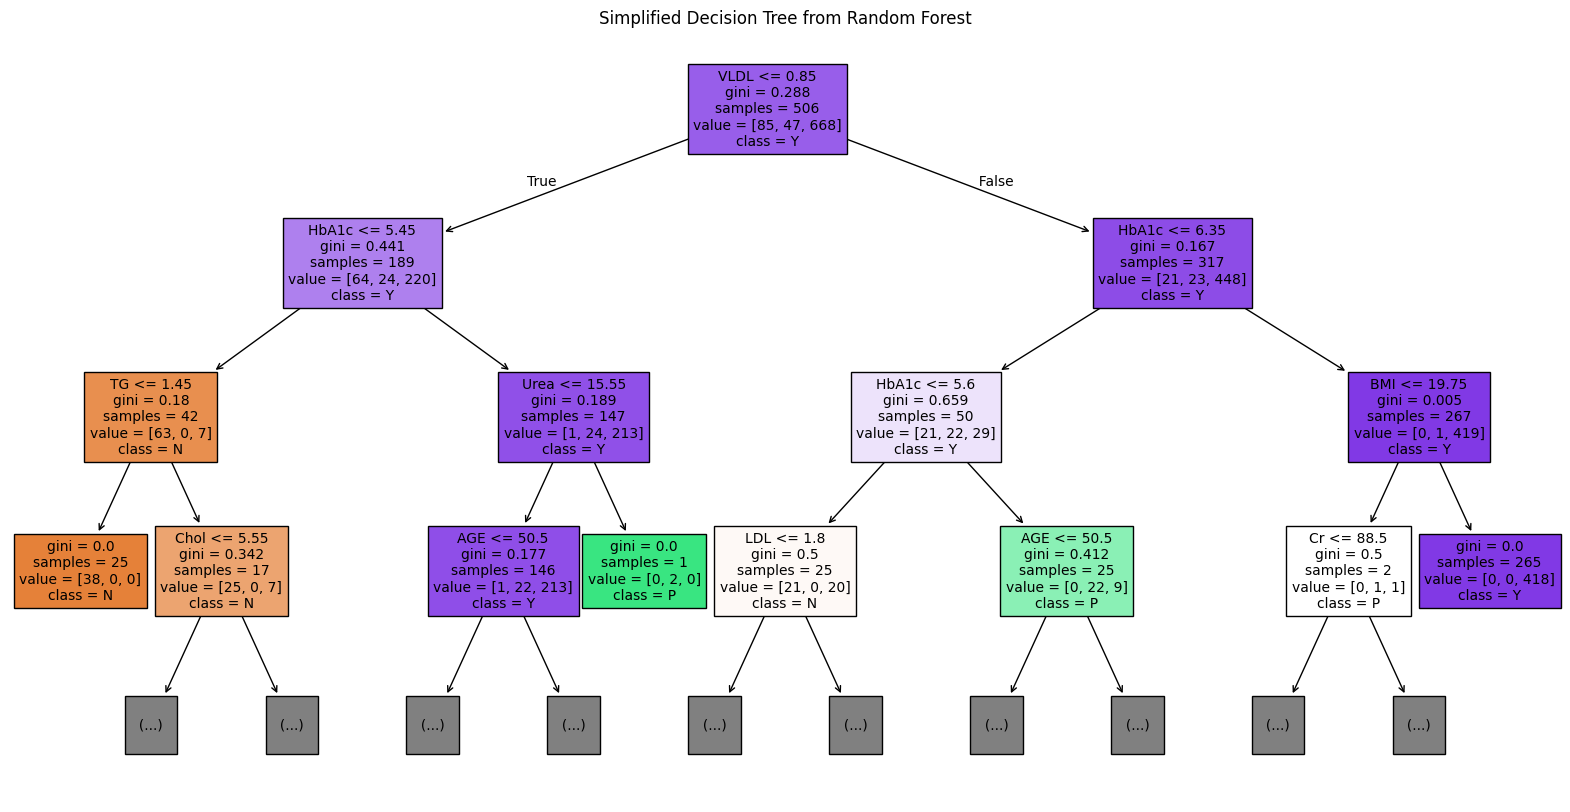

In [ ]:

plt.figure(figsize=(20, 10))
plot_tree(best_rf.estimators_[0],
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          max_depth=3,
          fontsize=10)
plt.title("Simplified Decision Tree from Random Forest")
plt.show()